In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1= pd.read_csv('CSED_t.csv')
df2= pd.read_csv('Admin_t.csv')
df3= pd.read_csv('design_lab_t.csv')

In [54]:
df1['Source']= 'CSED BLOCK'
df2['Source']= 'Admin block'
df3['Source']= '3D-LAB'

In [55]:
df1.head()

,timestamp,ENERGY,VOLTAGE,PF,FREQUENCY,POWER,CURRENT,Source
0,2024-03-25 05:28:56,889.05,251.6,0.0,50.0,0.0,0.0,CSED BLOCK
1,2024-03-25 05:28:29,889.05,251.8,0.0,50.0,0.0,0.0,CSED BLOCK
2,2024-03-25 05:28:01,889.05,251.7,0.0,50.0,0.0,0.0,CSED BLOCK
3,2024-03-25 05:27:06,889.05,252.1,0.0,50.0,0.0,0.0,CSED BLOCK
4,2024-03-25 05:27:05,889.05,252.3,0.0,50.0,0.0,0.0,CSED BLOCK


In [56]:
# Concatination of data
data = pd.concat([df1, df2, df3], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8600 non-null   object 
 1   ENERGY     7628 non-null   float64
 2   VOLTAGE    4206 non-null   float64
 3   PF         7555 non-null   float64
 4   FREQUENCY  8030 non-null   float64
 5   POWER      5301 non-null   float64
 6   CURRENT    7174 non-null   float64
 7   Source     8600 non-null   object 
dtypes: float64(6), object(2)
memory usage: 537.6+ KB


In [57]:
df =pd.DataFrame(data)
cd=['timestamp','Source']
df.drop(cd, axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ENERGY     7628 non-null   float64
 1   VOLTAGE    4206 non-null   float64
 2   PF         7555 non-null   float64
 3   FREQUENCY  8030 non-null   float64
 4   POWER      5301 non-null   float64
 5   CURRENT    7174 non-null   float64
dtypes: float64(6)
memory usage: 403.2 KB


In [58]:
# checking skewness
import matplotlib.pyplot as plt

for i in df.select_dtypes(include=np.number).columns:
    skew=df[i].skew()
    print(i,  skew)

ENERGY 1.0225424621749821
VOLTAGE 0.2895795491010397
PF -1.3238516184652498
FREQUENCY -0.1866736953030239
POWER 0.9992593826946583
CURRENT 1.1115614009965813


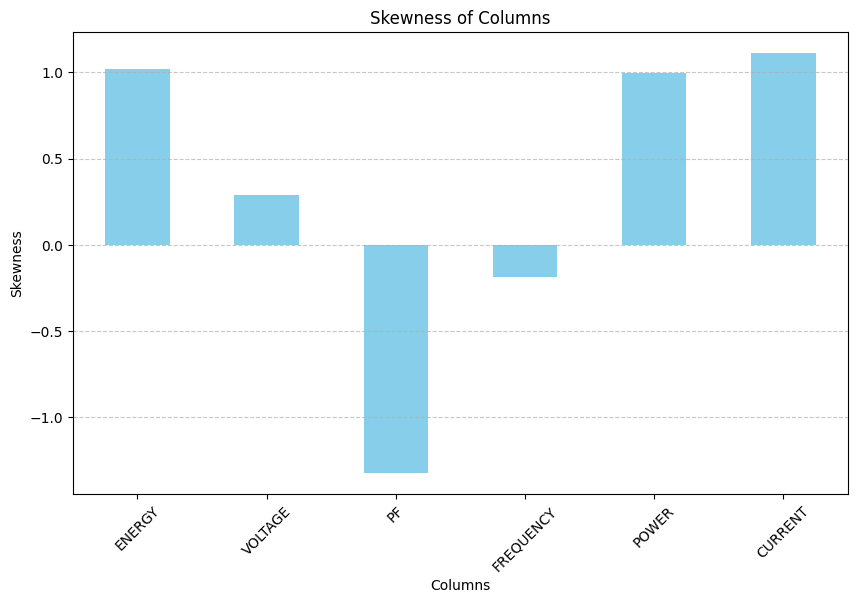

In [59]:
# plotting skewness
skewness = df.skew()
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [60]:
#Doing imputation according to skewness
data.isna().sum()/len(data)*100

timestamp     0.000000
ENERGY       11.302326
VOLTAGE      51.093023
PF           12.151163
FREQUENCY     6.627907
POWER        38.360465
CURRENT      16.581395
Source        0.000000
dtype: float64

In [61]:
# Imputations of
data['ENERGY'].fillna(data['ENERGY'].median())
data['VOLTAGE'].fillna(data['VOLTAGE'].median())
data['PF'].fillna(data['PF'].median())
data['FREQUENCY'].fillna(data['FREQUENCY'].mean())
data['POWER'].fillna(data['POWER'].median())
data['CURRENT'].fillna(data['CURRENT'].median())

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
8595    0.37
8596    0.37
8597    0.37
8598    0.37
8599    0.37
Name: CURRENT, Length: 8600, dtype: float64

In [62]:
data.isna().sum()/len(data)*100

timestamp     0.000000
ENERGY       11.302326
VOLTAGE      51.093023
PF           12.151163
FREQUENCY     6.627907
POWER        38.360465
CURRENT      16.581395
Source        0.000000
dtype: float64

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8600 non-null   object 
 1   ENERGY     7628 non-null   float64
 2   VOLTAGE    4206 non-null   float64
 3   PF         7555 non-null   float64
 4   FREQUENCY  8030 non-null   float64
 5   POWER      5301 non-null   float64
 6   CURRENT    7174 non-null   float64
 7   Source     8600 non-null   object 
dtypes: float64(6), object(2)
memory usage: 537.6+ KB


In [64]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['adjusted_timestamp'] = data['timestamp'] + pd.Timedelta(hours=5, minutes=30)
data.head()

,timestamp,ENERGY,VOLTAGE,PF,FREQUENCY,POWER,CURRENT,Source,adjusted_timestamp
0,2024-03-25 05:28:56,889.05,251.6,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:58:56
1,2024-03-25 05:28:29,889.05,251.8,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:58:29
2,2024-03-25 05:28:01,889.05,251.7,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:58:01
3,2024-03-25 05:27:06,889.05,252.1,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:57:06
4,2024-03-25 05:27:05,889.05,252.3,0.0,50.0,0.0,0.0,CSED BLOCK,2024-03-25 10:57:05


In [65]:
# Finding peak Hour

data['hour'] = data['adjusted_timestamp'].dt.hour

hourly_energy_consumption = data.groupby('hour')['ENERGY'].mean()

peak_hour = hourly_energy_consumption.idxmax()

print("Peak hour of energy consumption:", peak_hour)

Peak hour of energy consumption: 2


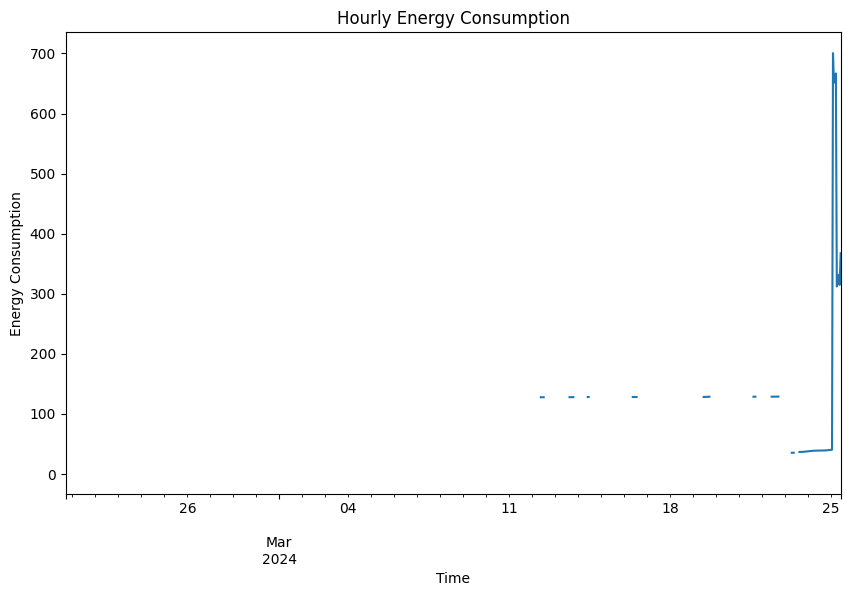

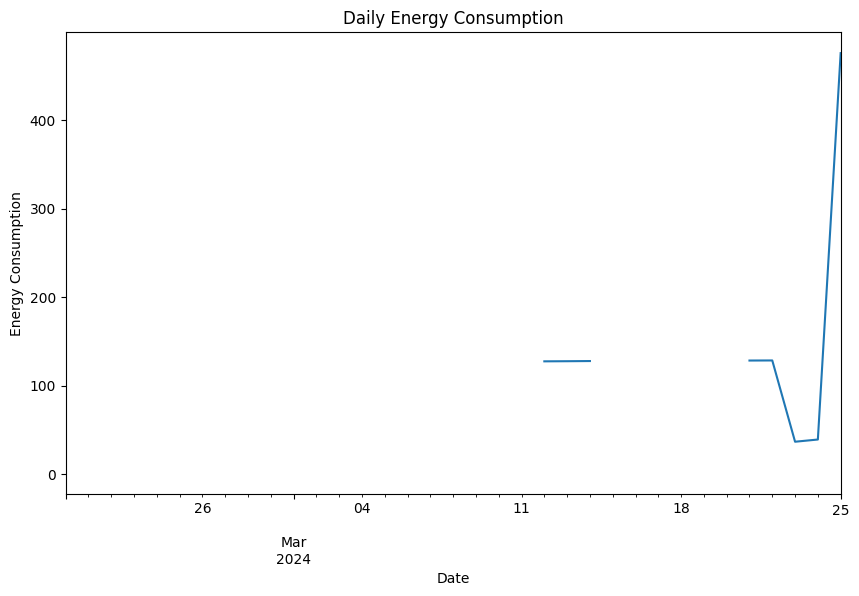

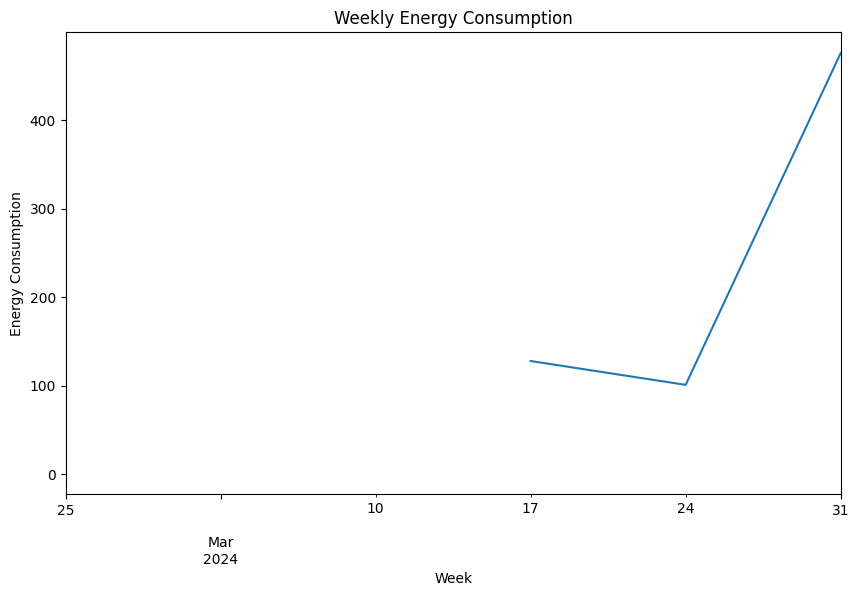

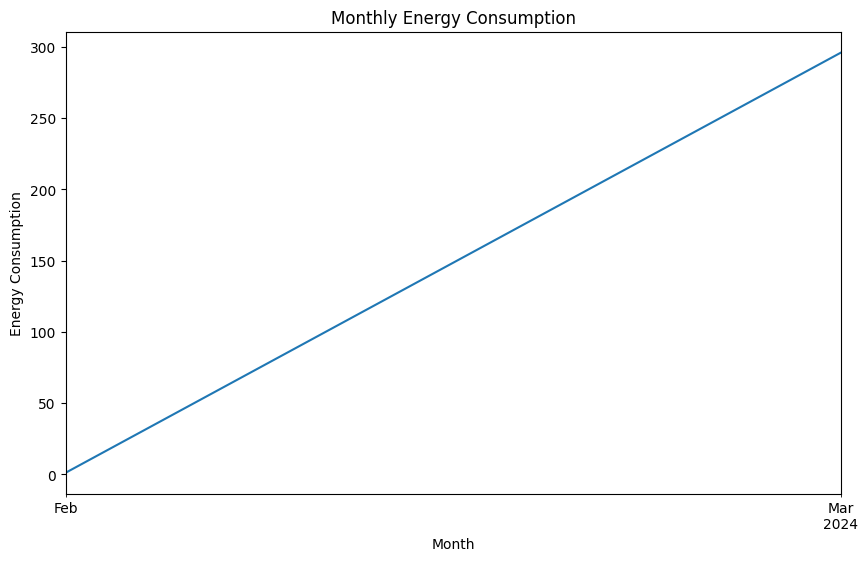

In [66]:
##consumption pattern Analysis hourly,Daily,monthly!

# Set 'timestamp' as the index of the DataFrame for easier time-based operations
data.set_index('adjusted_timestamp', inplace=True)

# Resample the data to get hourly, daily, weekly, and monthly energy consumption
hourly_energy = data['ENERGY'].resample('H').mean()
daily_energy = data['ENERGY'].resample('D').mean()
weekly_energy = data['ENERGY'].resample('W').mean()
monthly_energy = data['ENERGY'].resample('M').mean()

# Plot energy consumption throughout the day
plt.figure(figsize=(10, 6))
hourly_energy.plot()
plt.title('Hourly Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()

# Plot energy consumption throughout the week
plt.figure(figsize=(10, 6))
daily_energy.plot()
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

# Plot energy consumption throughout the month
plt.figure(figsize=(10, 6))
weekly_energy.plot()
plt.title('Weekly Energy Consumption')
plt.xlabel('Week')
plt.ylabel('Energy Consumption')
plt.show()

# Plot energy consumption throughout the year
plt.figure(figsize=(10, 6))
monthly_energy.plot()
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Consumption')
plt.show()

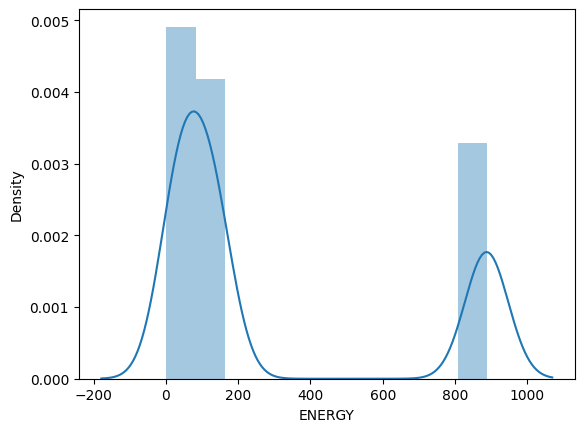

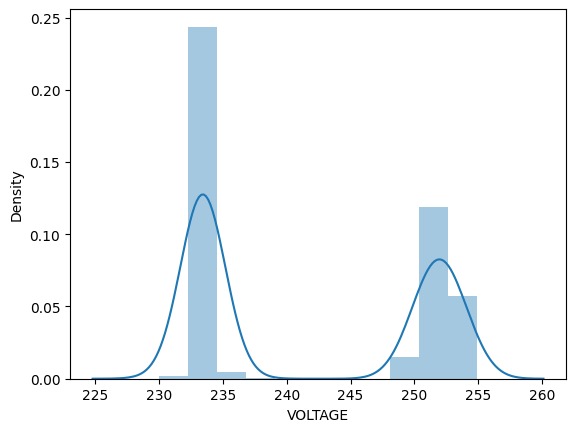

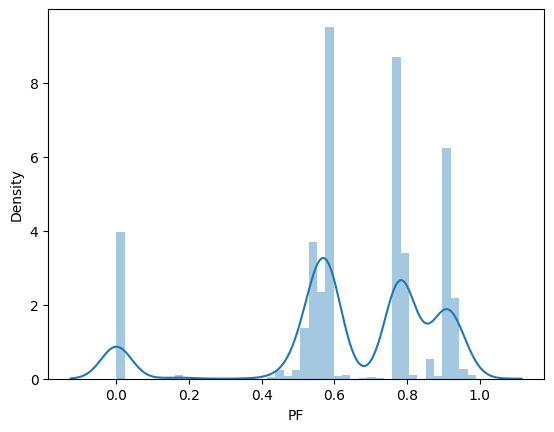

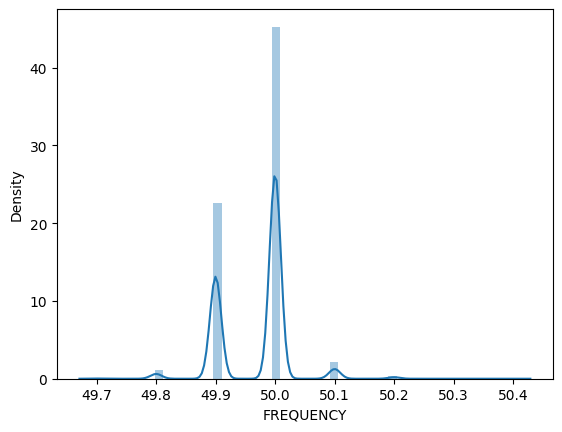

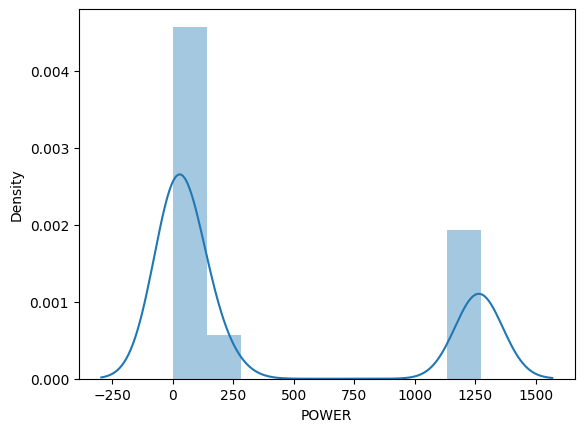

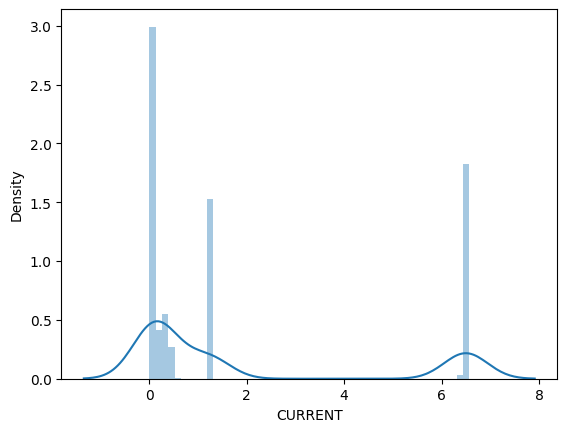

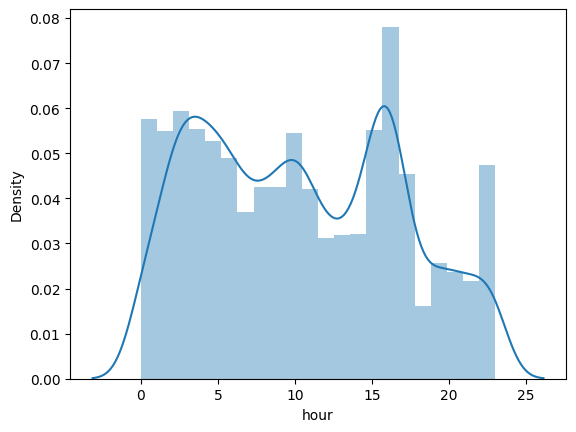

In [67]:
# univariate Analysis along Diffrent variable

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for i in data.select_dtypes(include=np.number).columns:
    sns.distplot(data[i])
    plt.show()

In [68]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,8600,2024-03-23 14:36:24.461046528,2024-02-20 11:39:49,2024-03-22 08:49:16.500000,2024-03-24 18:11:50.500000,2024-03-24 23:44:36.500000,2024-03-25 05:28:56,NaN
ENERGY,7628.0,295.054376,1.07,41.04,128.45,884.4,889.05,358.399593
VOLTAGE,4206.0,241.429173,230.0,233.4,233.6,251.775,254.9,9.224318
PF,7555.0,0.648068,0.0,0.56,0.64,0.79,0.99,0.250199
FREQUENCY,8030.0,49.969203,49.7,49.9,50.0,50.0,50.4,0.058026
POWER,5301.0,373.953198,0.0,9.6,28.0,1261.8,1272.3,547.177262
CURRENT,7174.0,1.906931,0.0,0.09,0.37,1.24,6.57,2.637289
hour,8600.0,10.403256,0.0,5.0,10.0,16.0,23.0,6.393132


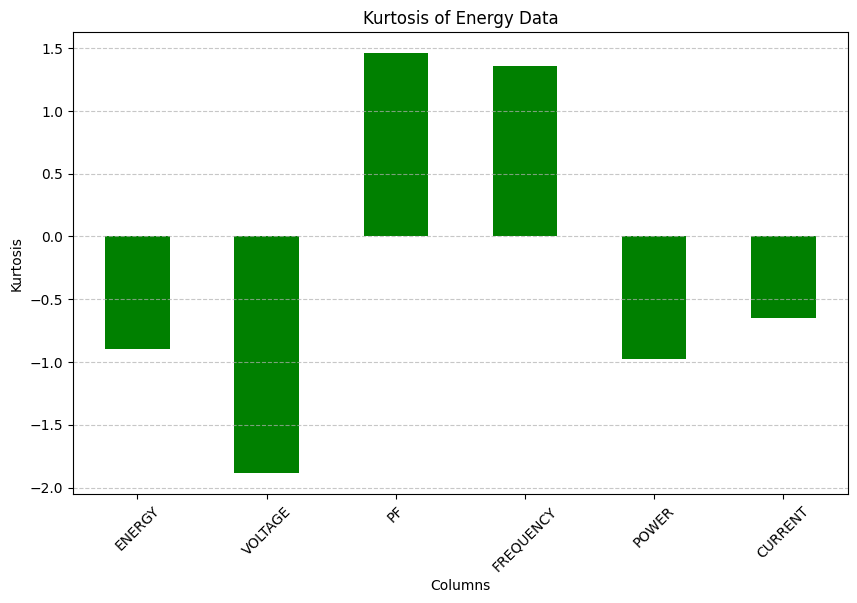

In [69]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
kurtosis_values = df[numeric_columns].kurtosis()

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
kurtosis_values.plot(kind='bar', color='green')
plt.title('Kurtosis of Energy Data')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1200x800 with 0 Axes>

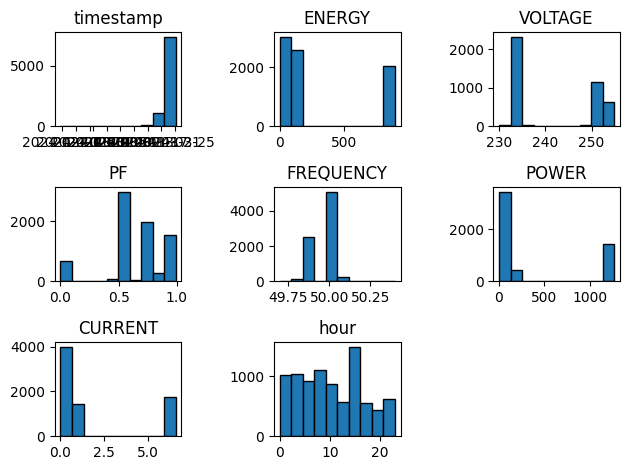

In [70]:
plt.figure(figsize=(12, 8))
data.hist(bins=10, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

Error: An unexpected error occurred: ufunc 'log1p' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


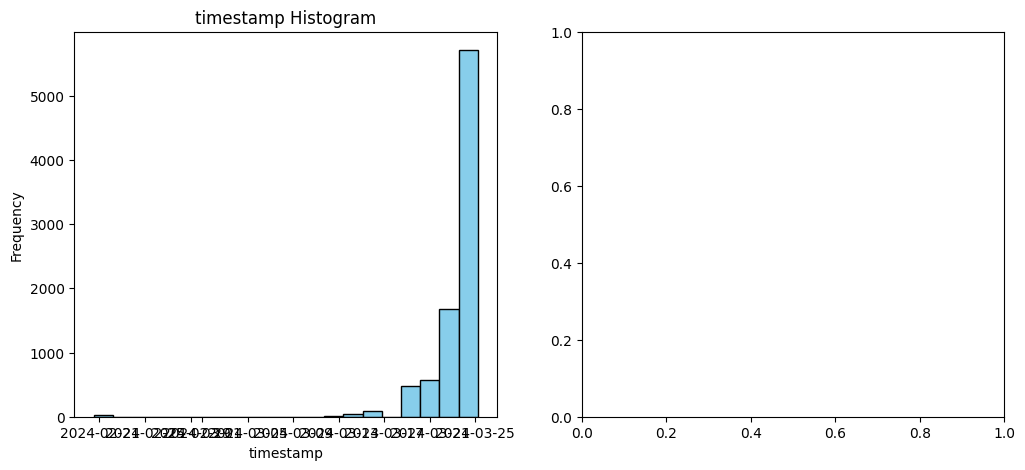

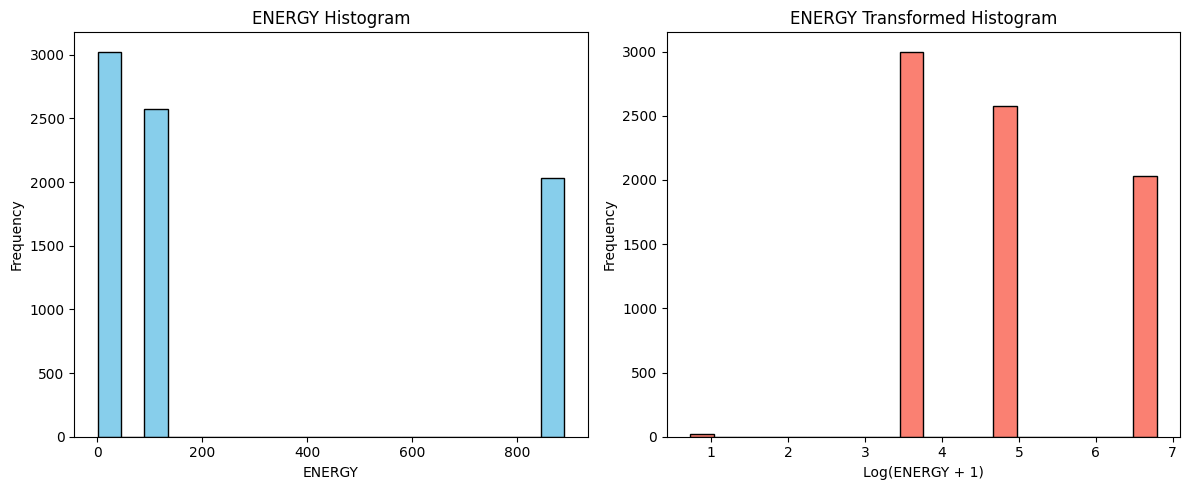

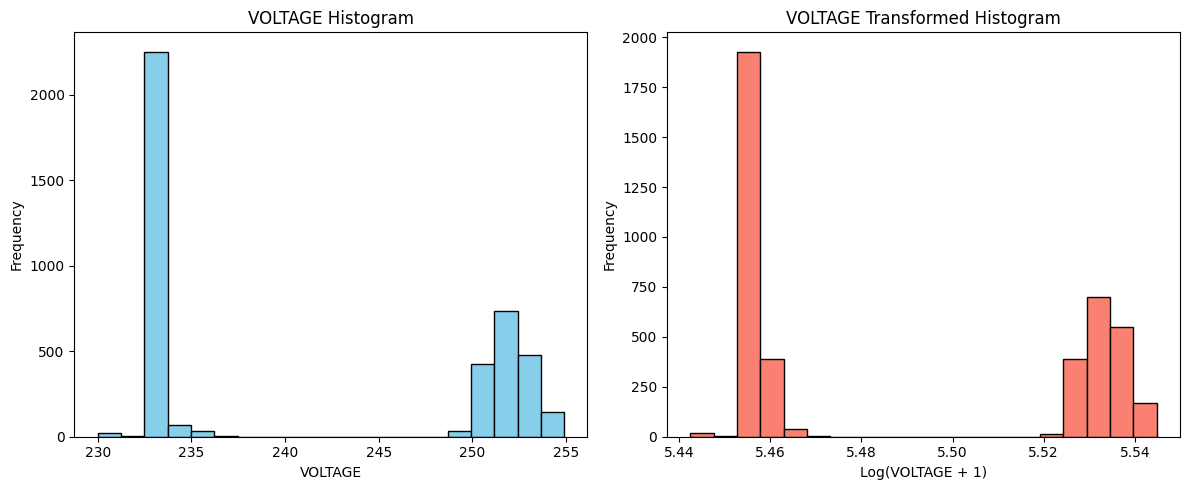

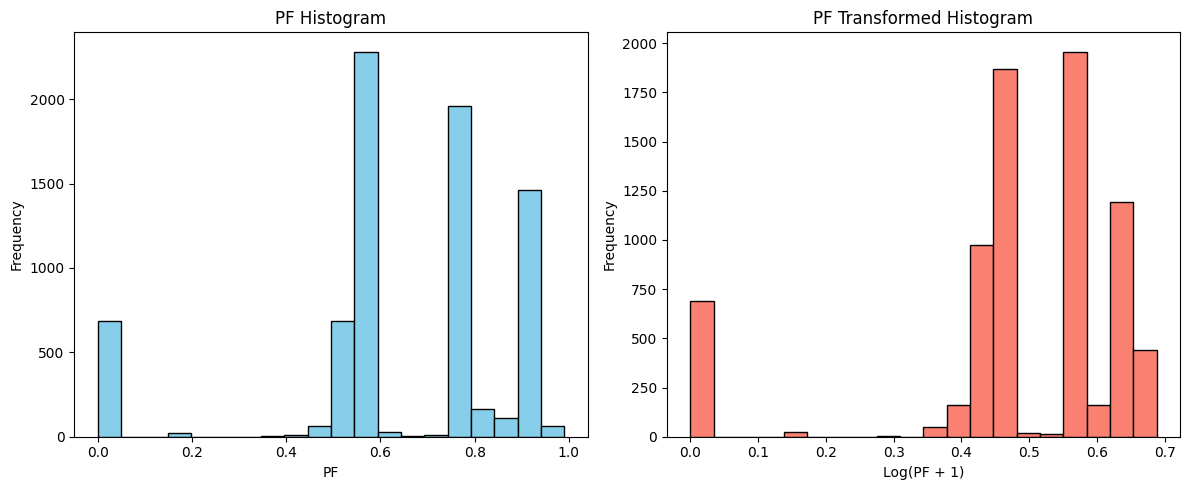

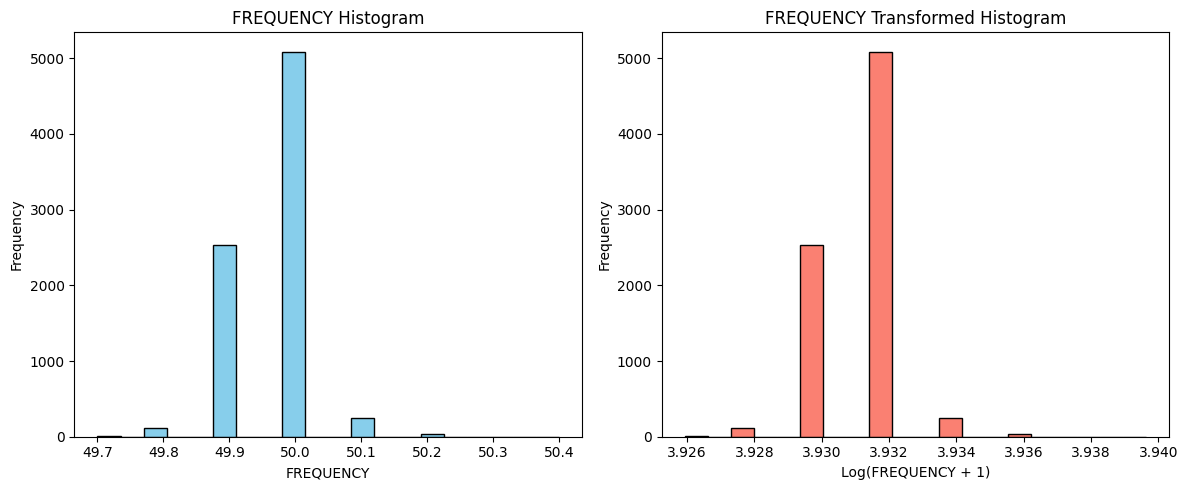

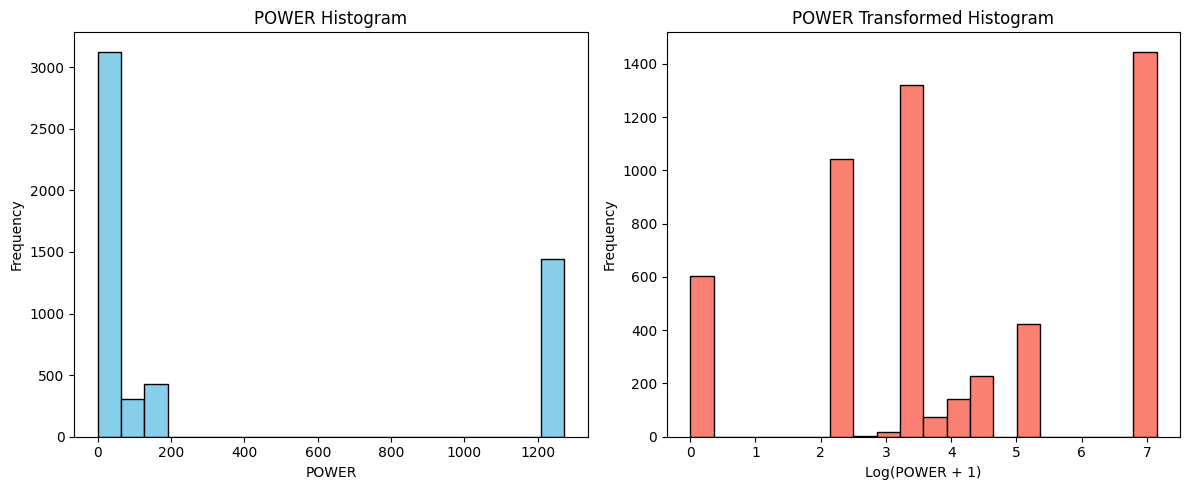

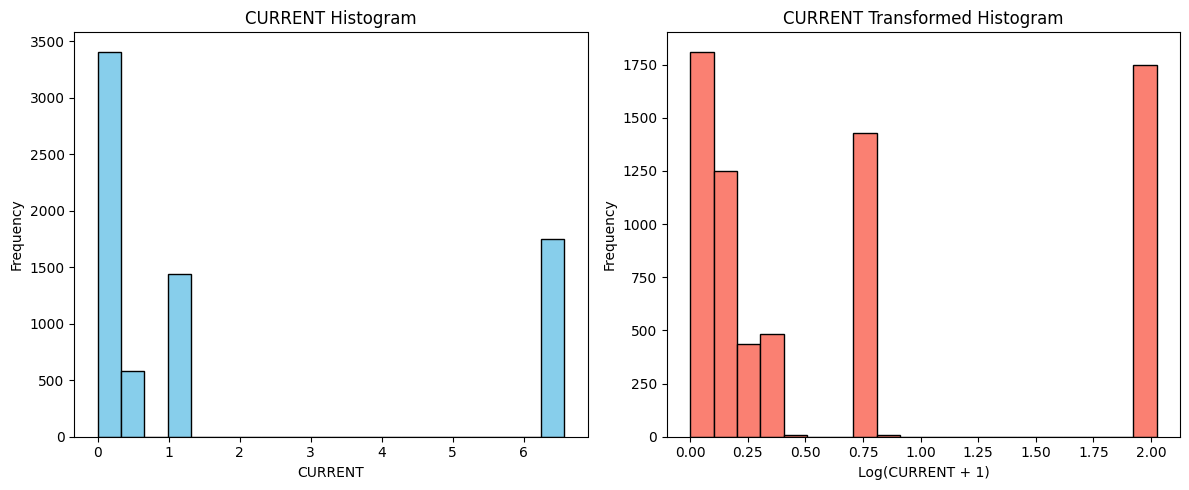

Error: An unexpected error occurred: loop of ufunc does not support argument 0 of type str which has no callable log1p method


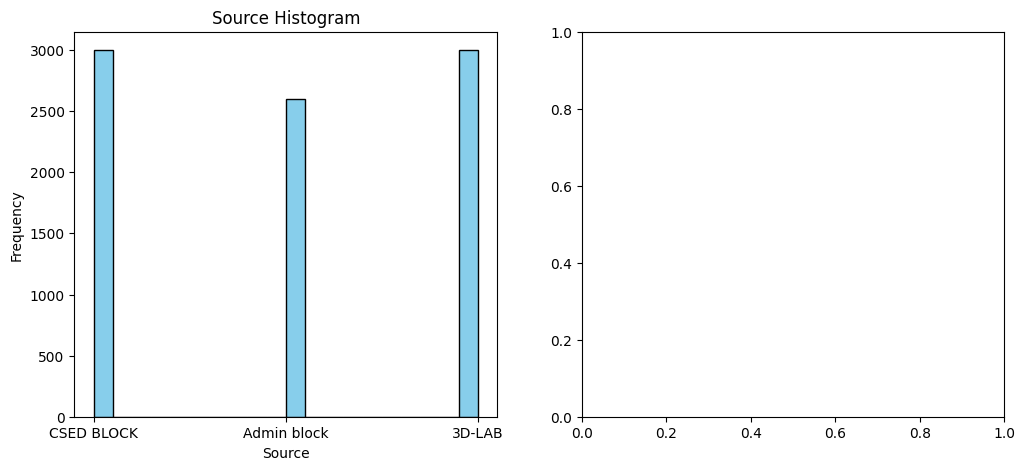

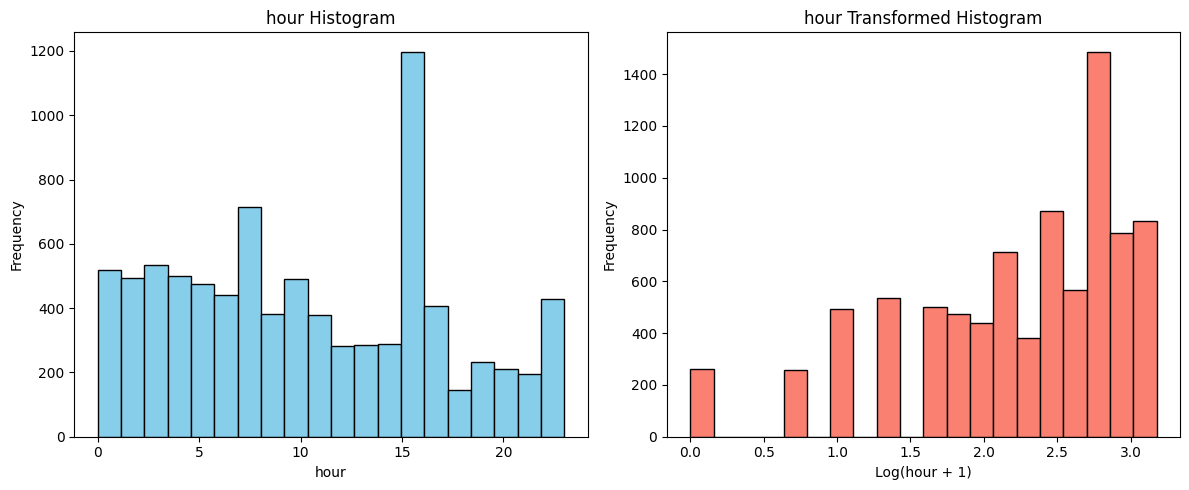

In [71]:
#If You want Transformation :
#if the variable exhibits skewness or non-normality to make the
#distribution more symmetric.

# Function to plot histogram and transformed histogram
def plot_histograms(data, column):
    try:
        # Plot original histogram
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'{column} Histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Plot histogram after transformation (log transformation in this example)
        plt.subplot(1, 2, 2)
        transformed_data = np.log1p(data[column])  # Applying log transformation
        plt.hist(transformed_data, bins=20, color='salmon', edgecolor='black')
        plt.title(f'{column} Transformed Histogram')
        plt.xlabel(f'Log({column} + 1)')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()


    except KeyError as e:
            print(f"Error: Column '{column}' not found in the dataset.")
    except Exception as e:
            print(f"Error: An unexpected error occurred: {str(e)}")

# Plot histograms and transformed histograms for each column
for col in data.columns:
    plot_histograms(data, col)

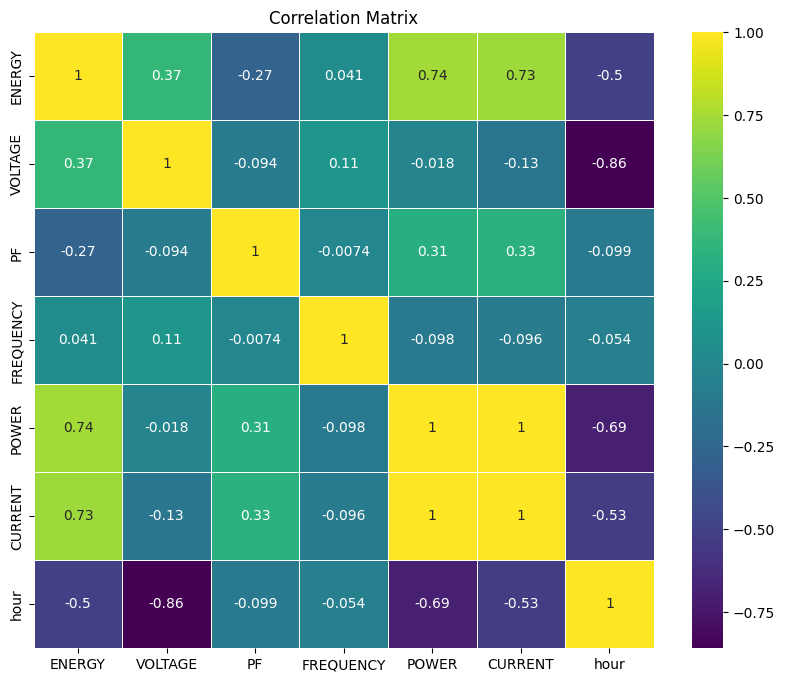

In [72]:
# heatmap
numeric_df = data.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

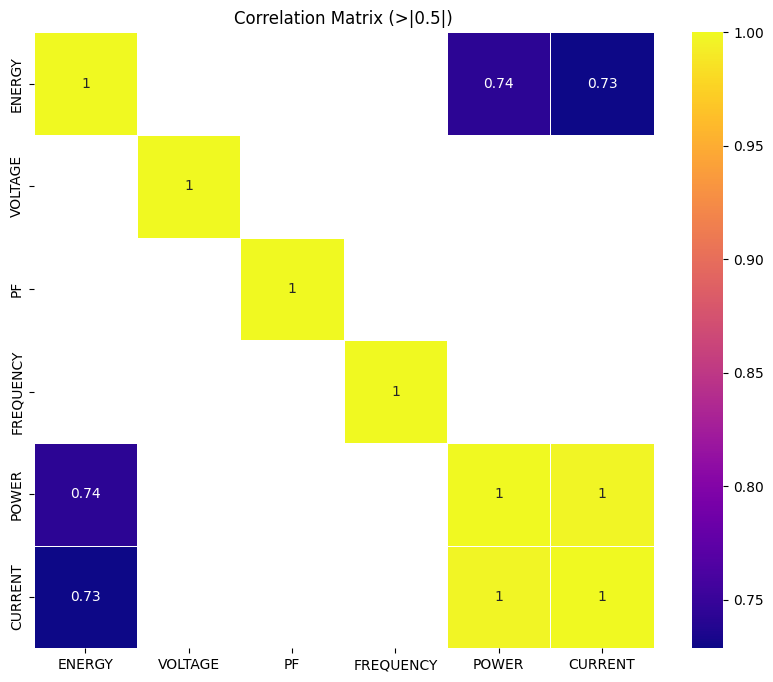

In [73]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for values greater than 0.5
mask = correlation_matrix.abs() > 0.5

# Apply the mask to filter the correlation matrix
filtered_correlation_matrix = correlation_matrix.where(mask)

# Plot filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="plasma", linewidths=.5)
plt.title("Correlation Matrix (>|0.5|)")
plt.show()

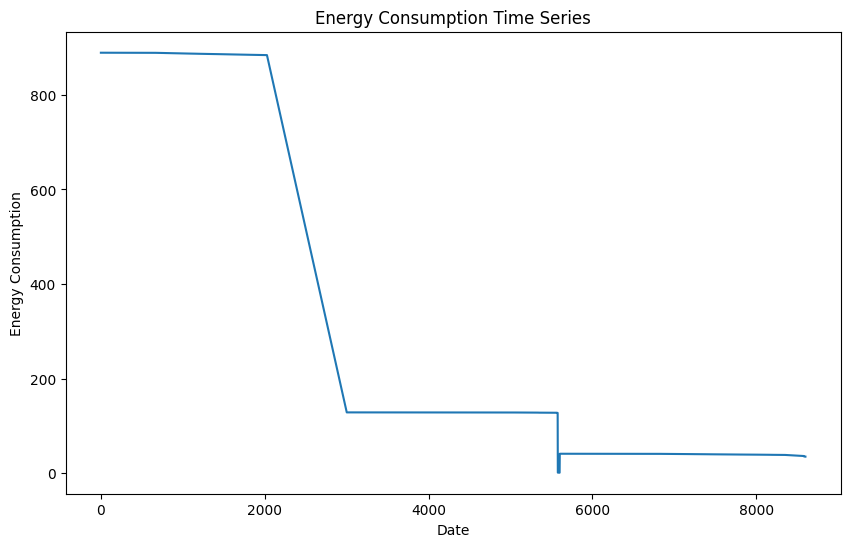

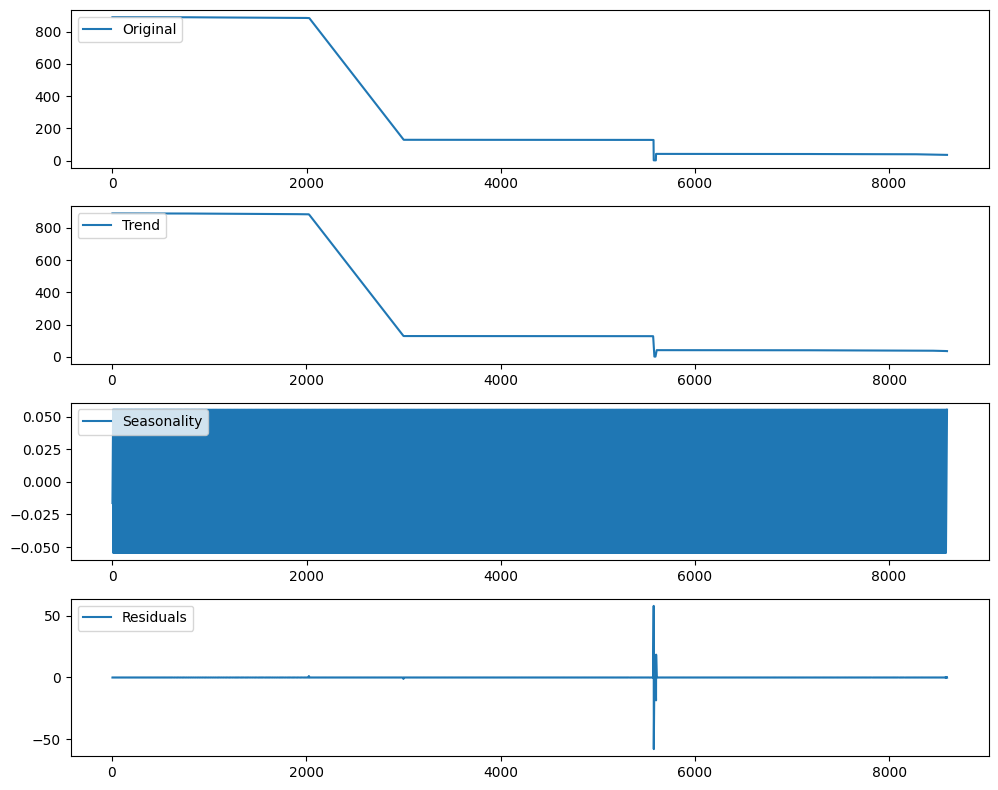

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame with a datetime index

# Interpolate missing values in the 'ENERGY' column
df['ENERGY'] = df['ENERGY'].interpolate(method='linear')

# Visualize the time series
df['ENERGY'].plot(figsize=(10, 6))
plt.title('Energy Consumption Time Series')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(df['ENERGY'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['ENERGY'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


CONCLUSION: Above analytics on usage pattern analytics which Answers on following:

What are the peak hours of energy consumption for single-phase users?
How does energy usage vary throughout the day, week, or month for single-phase consumers?
Are there any recurring patterns or trends in energy consumption among single-phase users?
How does energy usage differ between weekdays and weekends for single-phase consumers?


In [75]:
#data Fetch realtime from Thingworx   and tariff generation

import requests
def calculate_bill(units):
    slab1_rate = 4.41
    slab2_rate = 9.64
    slab3_rate = 13.61

    # Slab boundaries
    slab1_limit = 100
    slab2_limit = 300
    slab3_limit = 500

    # Calculate bill based on different slabs
    if units <= slab1_limit:
        bill = units * slab1_rate
    elif units <= slab2_limit:
        bill = (slab1_limit * slab1_rate) + ((units - slab1_limit) * slab2_rate)
    elif units <= slab3_limit:
        bill = (slab1_limit * slab1_rate) + ((slab2_limit - slab1_limit) * slab2_rate) + ((units - slab2_limit) * slab3_rate)
    else:
        bill = (slab1_limit * slab1_rate) + ((slab2_limit - slab1_limit) * slab2_rate) + ((slab3_limit - slab2_limit) * slab3_rate) + ((units - slab3_limit) * slab3_rate)

    return bill



# Define ThingWorx server details
THINGWORX_HOST = 'http://thingworx.scetngp.com'
THINGWORX_PORT = '80'
THINGWORX_USERNAME = 'IIOT33'
THINGWORX_PASSWORD = 'scetngp123456'

# Define ThingWorx entity details (e.g., Thing, Property)
THING_NAME = 'PZEM_SMART_ENERGY1'
PROPERTY_NAME = 'ENERGY'

# Construct the ThingWorx URL
url = f"{THINGWORX_HOST}:{THINGWORX_PORT}/Thingworx/Things/{THING_NAME}/Properties/{PROPERTY_NAME}"

# Set up authentication headers
headers = {
    'Content-Type': 'application/json',
    'Accept': 'application/json',
    'AppKey': '5b63af49-3dcf-41a7-995c-9b8c1adb624f',  # If required by your ThingWorx configuration
}

# Make a GET request to ThingWorx
response = requests.get(url, auth=(THINGWORX_USERNAME, THINGWORX_PASSWORD), headers=headers)




# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the data from the response
    data = response.json()
    property_value = data['rows'][0]['ENERGY']  # Adjust as per your response structure

    # Now you can use 'property_value' on your Raspberry Pi
    print("TOTAL ENERGY CONSUMED-kWAh:", property_value)
    pr= (input('enetr prev Reading = '))
    Cr= float (property_value)
    diff=  Cr-float(pr)
    total_bill = calculate_bill(diff)
    print("Electric bill for {} units: ₹{}".format(diff, total_bill))


else:
    print("Failed to fetch data from ThingWorx. Status code:", response.status_code)


TOTAL ENERGY CONSUMED-kWAh: 1118.17
enetr prev Reading = 4
Electric bill for 1114.17 units: ₹13449.853700000001


In [76]:
df.columns

Index(['ENERGY', 'VOLTAGE', 'PF', 'FREQUENCY', 'POWER', 'CURRENT'], dtype='object')

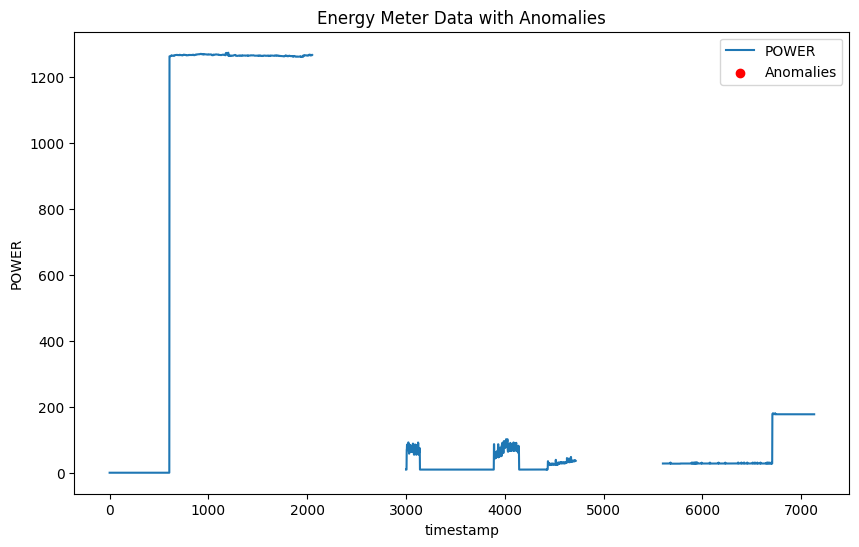

In [77]:
# Anomaly Detection
# Example: Detect anomalies using z-score for 'Power' column
mean_power = df['POWER'].mean()
std_power = df['POWER'].std()
threshold = 3  # Adjust threshold as needed
anomalies = df[(df['POWER'] - mean_power).abs() > threshold * std_power]

# Visualize anomalies
# Example: Plot 'Power' column with detected anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['POWER'], label='POWER')
plt.scatter(anomalies.index, anomalies['POWER'], color='red', label='Anomalies')
plt.xlabel('timestamp')
plt.ylabel('POWER')
plt.title('Energy Meter Data with Anomalies')
plt.legend()
plt.show()
